In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.table import Table

In [5]:

list_1 = [random.randint(0, 100) for _ in range(40)]
list_2 = [random.randint(0, 100) for _ in range(40)]
list_3 = [random.randint(0, 100) for _ in range(40)]


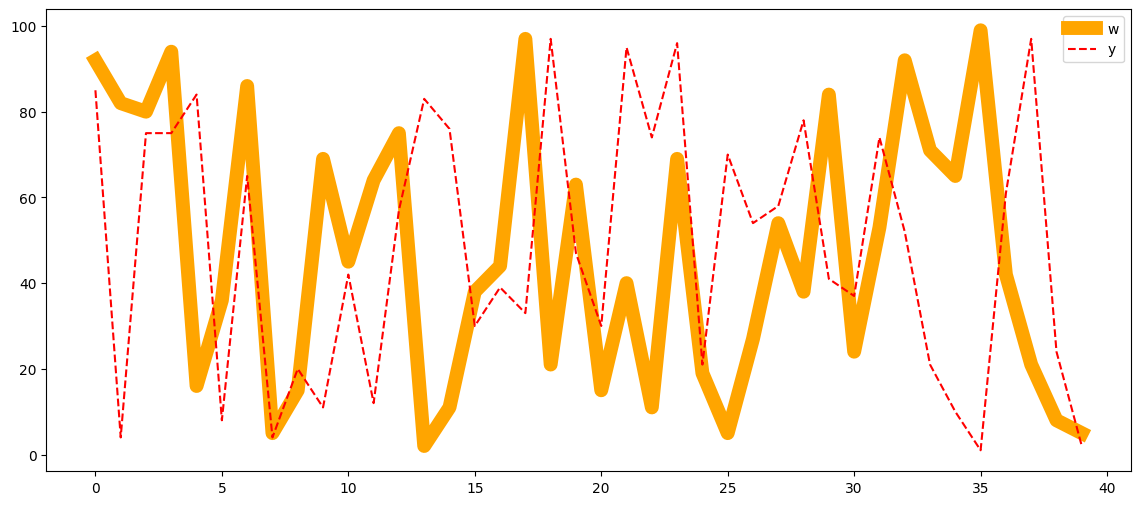

In [14]:


fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(range(40), list_1, color='orange', linewidth=10, label='w')
ax.plot(range(40), list_2, color='red', linestyle='dashed', label='y')

ax.legend()
plt.show()

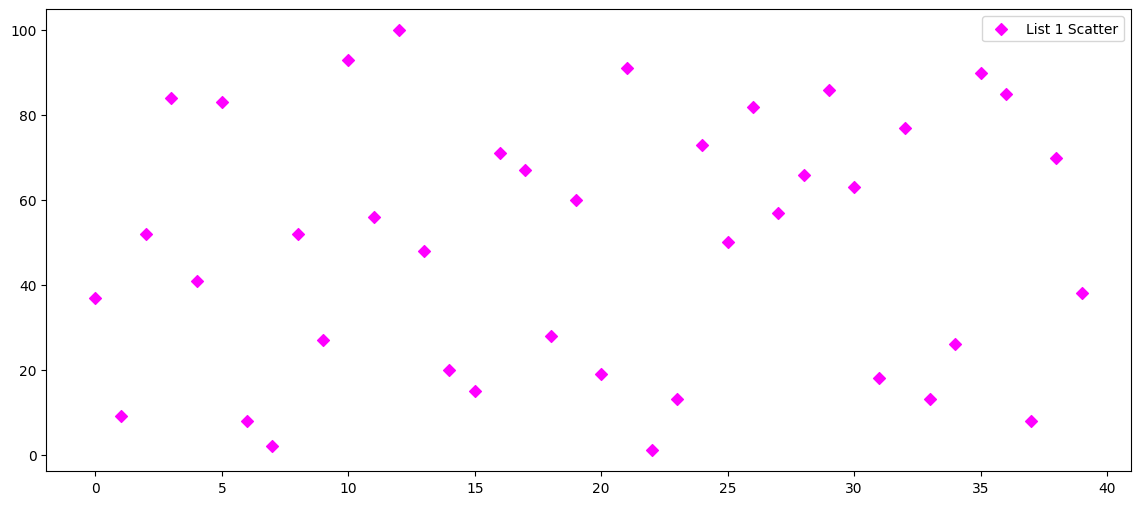

In [18]:

fig, ax = plt.subplots(figsize=(14, 6))
ax.scatter(range(40), list_3, color='magenta', marker='D', label='List 1 Scatter')

ax.legend()
plt.show()

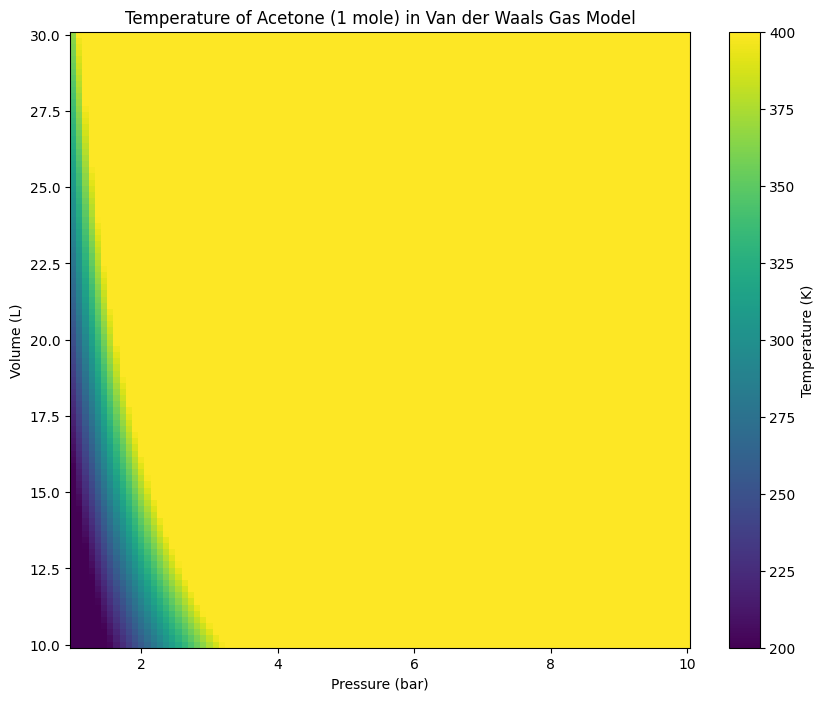

In [19]:

R = 0.08314
a_acetone = 16.02
b_acetone = 0.1124

# Pressure and volume ranges
pressure_range = np.linspace(1, 10, 100)
volume_range = np.linspace(10, 30, 100)

pressure_grid, volume_grid = np.meshgrid(pressure_range, volume_range)
temperature_grid = (pressure_grid + a_acetone / volume_grid**2) * (volume_grid - b_acetone) / (R)

plt.figure(figsize=(10, 8))
cmap = plt.cm.viridis
plt.pcolormesh(pressure_grid, volume_grid, temperature_grid, cmap=cmap, shading='auto', vmin=200, vmax=400)

plt.xlabel('Pressure (bar)')
plt.ylabel('Volume (L)')
plt.title('Temperature of Acetone (1 mole) in Van der Waals Gas Model')

cbar = plt.colorbar(label='Temperature (K)')
plt.show()

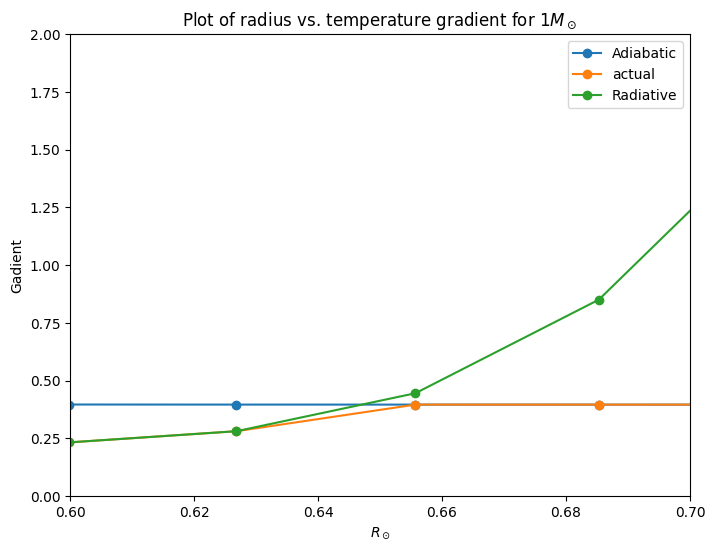

In [21]:
sim = Table.read('structure_00001.txt', format = 'ascii', header_start = 0)
sim0_5m = Table.read('structure_00001_0_5m.txt', format = 'ascii', header_start = 0)
sim_4m = Table.read('structure_00001_4m.txt', format = 'ascii', header_start = 0)

column_2 = [row[1] for row in sim]
column_11 = [row[10] for row in sim]
column_17= [row[16] for row in sim]
column_16= [row[15] for row in sim]

plt.figure(figsize=(8, 6))

plt.plot(column_2, column_11, marker='o', label = 'Adiabatic', linestyle='-')
plt.plot(column_2, column_17, marker='o', label = 'actual', linestyle='-')
plt.plot(column_2, column_16, marker='o', label ='Radiative', linestyle='-')
plt.legend()
plt.ylim(0, 2)
plt.xlim(0.6,0.7)
# r_c = 0.66M

plt.xlabel('$R_\odot$')
plt.ylabel('Gadient')
plt.title('Plot of radius vs. temperature gradient for $1M_\odot$')
#Here we can see that the convetive layer is near the outer edge of the radius where radiative beats adiabatic temp gradient.

Text(0.5, 1.0, 'Plot of radius vs. temperature gradient for $0.5M_\\odot$')

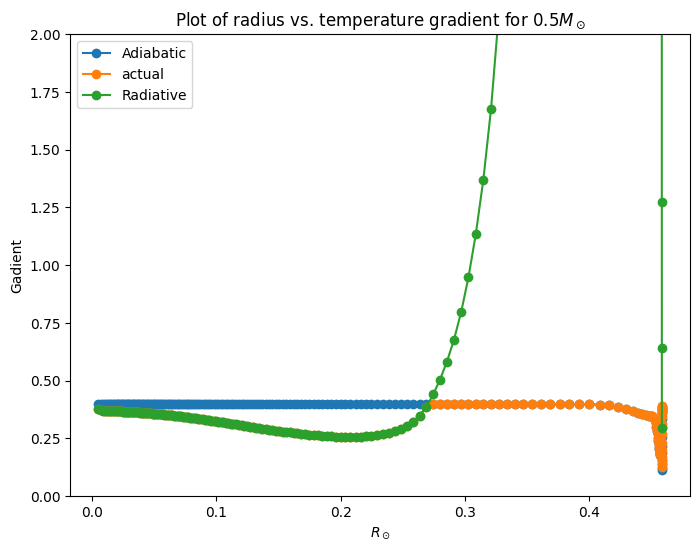

In [22]:
column_2 = [row[1] for row in sim0_5m]
column_11 = [row[10] for row in sim0_5m]
column_17= [row[16] for row in sim0_5m]
column_16= [row[15] for row in sim0_5m]

plt.figure(figsize=(8, 6))

plt.plot(column_2, column_11, marker='o', label = 'Adiabatic', linestyle='-')
plt.plot(column_2, column_17, marker='o', label = 'actual', linestyle='-')
plt.plot(column_2, column_16, marker='o', label ='Radiative', linestyle='-')
plt.legend()
plt.ylim(0, 2)

plt.xlabel('$R_\odot$')
plt.ylabel('Gadient')
plt.title('Plot of radius vs. temperature gradient for $0.5M_\odot$')
#Here we can see this is also an outer edge.

Text(0.5, 1.0, 'Plot of radius vs. temperature gradient for $4M_\\odot$')

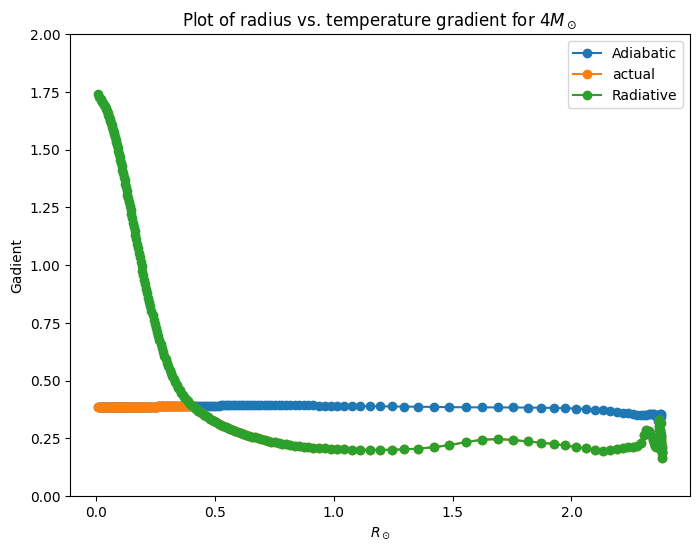

In [23]:
column_2 = [row[1] for row in sim_4m]
column_11 = [row[10] for row in sim_4m]
column_17= [row[16] for row in sim_4m]
column_16= [row[15] for row in sim_4m]

plt.figure(figsize=(8, 6))


plt.plot(column_2, column_11, marker='o', label = 'Adiabatic', linestyle='-')
plt.plot(column_2, column_17, marker='o', label = 'actual', linestyle='-')
plt.plot(column_2, column_16, marker='o', label ='Radiative', linestyle='-')
plt.legend()
plt.ylim(0, 2)

plt.xlabel('$R_\odot$')
plt.ylabel('Gadient')
plt.title('Plot of radius vs. temperature gradient for $4M_\odot$')
#here its near the core of the star.

For N = 1000, Estimated π = 3.124000


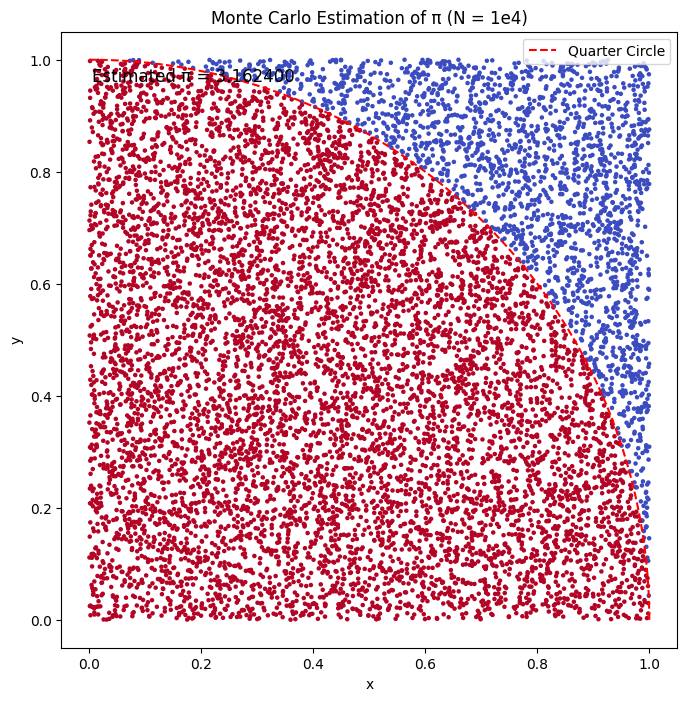

For N = 10000, Estimated π = 3.162400
For N = 100000, Estimated π = 3.147960
For N = 1000000, Estimated π = 3.143616


In [25]:

def estimate_pi(N):
    points = np.random.rand(N, 2)
    distances = np.linalg.norm(points, axis=1)
    inside_circle = distances <= 1

    pi_estimate = 4 * np.sum(inside_circle) / N 

    return pi_estimate, points, inside_circle

N_values = [int(1e3), int(1e4), int(1e5), int(1e6)]

for N in N_values:
    pi_estimate, points, inside_circle = estimate_pi(N)

    if N == int(1e4):
        plt.figure(figsize=(8, 8))
        plt.scatter(points[:, 0], points[:, 1], c=inside_circle, cmap='coolwarm', s=5)
        plt.title('Monte Carlo Estimation of π (N = 1e4)')
        plt.xlabel('x')
        plt.ylabel('y')

        theta = np.linspace(0, np.pi/2, 100)
        plt.plot(np.cos(theta), np.sin(theta), 'r--', label='Quarter Circle')
        
        plt.gca().set_aspect('equal', adjustable='box')
        plt.text(0.05, 0.92, f'Estimated π = {pi_estimate:.6f}', transform=plt.gca().transAxes, fontsize=12)

        plt.legend()
        plt.show()
    print(f'For N = {N}, Estimated π = {pi_estimate:.6f}')